In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../DATA/CIA_Country_Facts.csv')

# EXPLORATORY ANALYSIS

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


<AxesSubplot:xlabel='Population', ylabel='Count'>

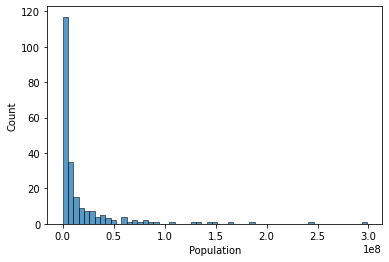

In [6]:
sns.histplot(data = df[df["Population"] < 500000000], x = 'Population')

In [7]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

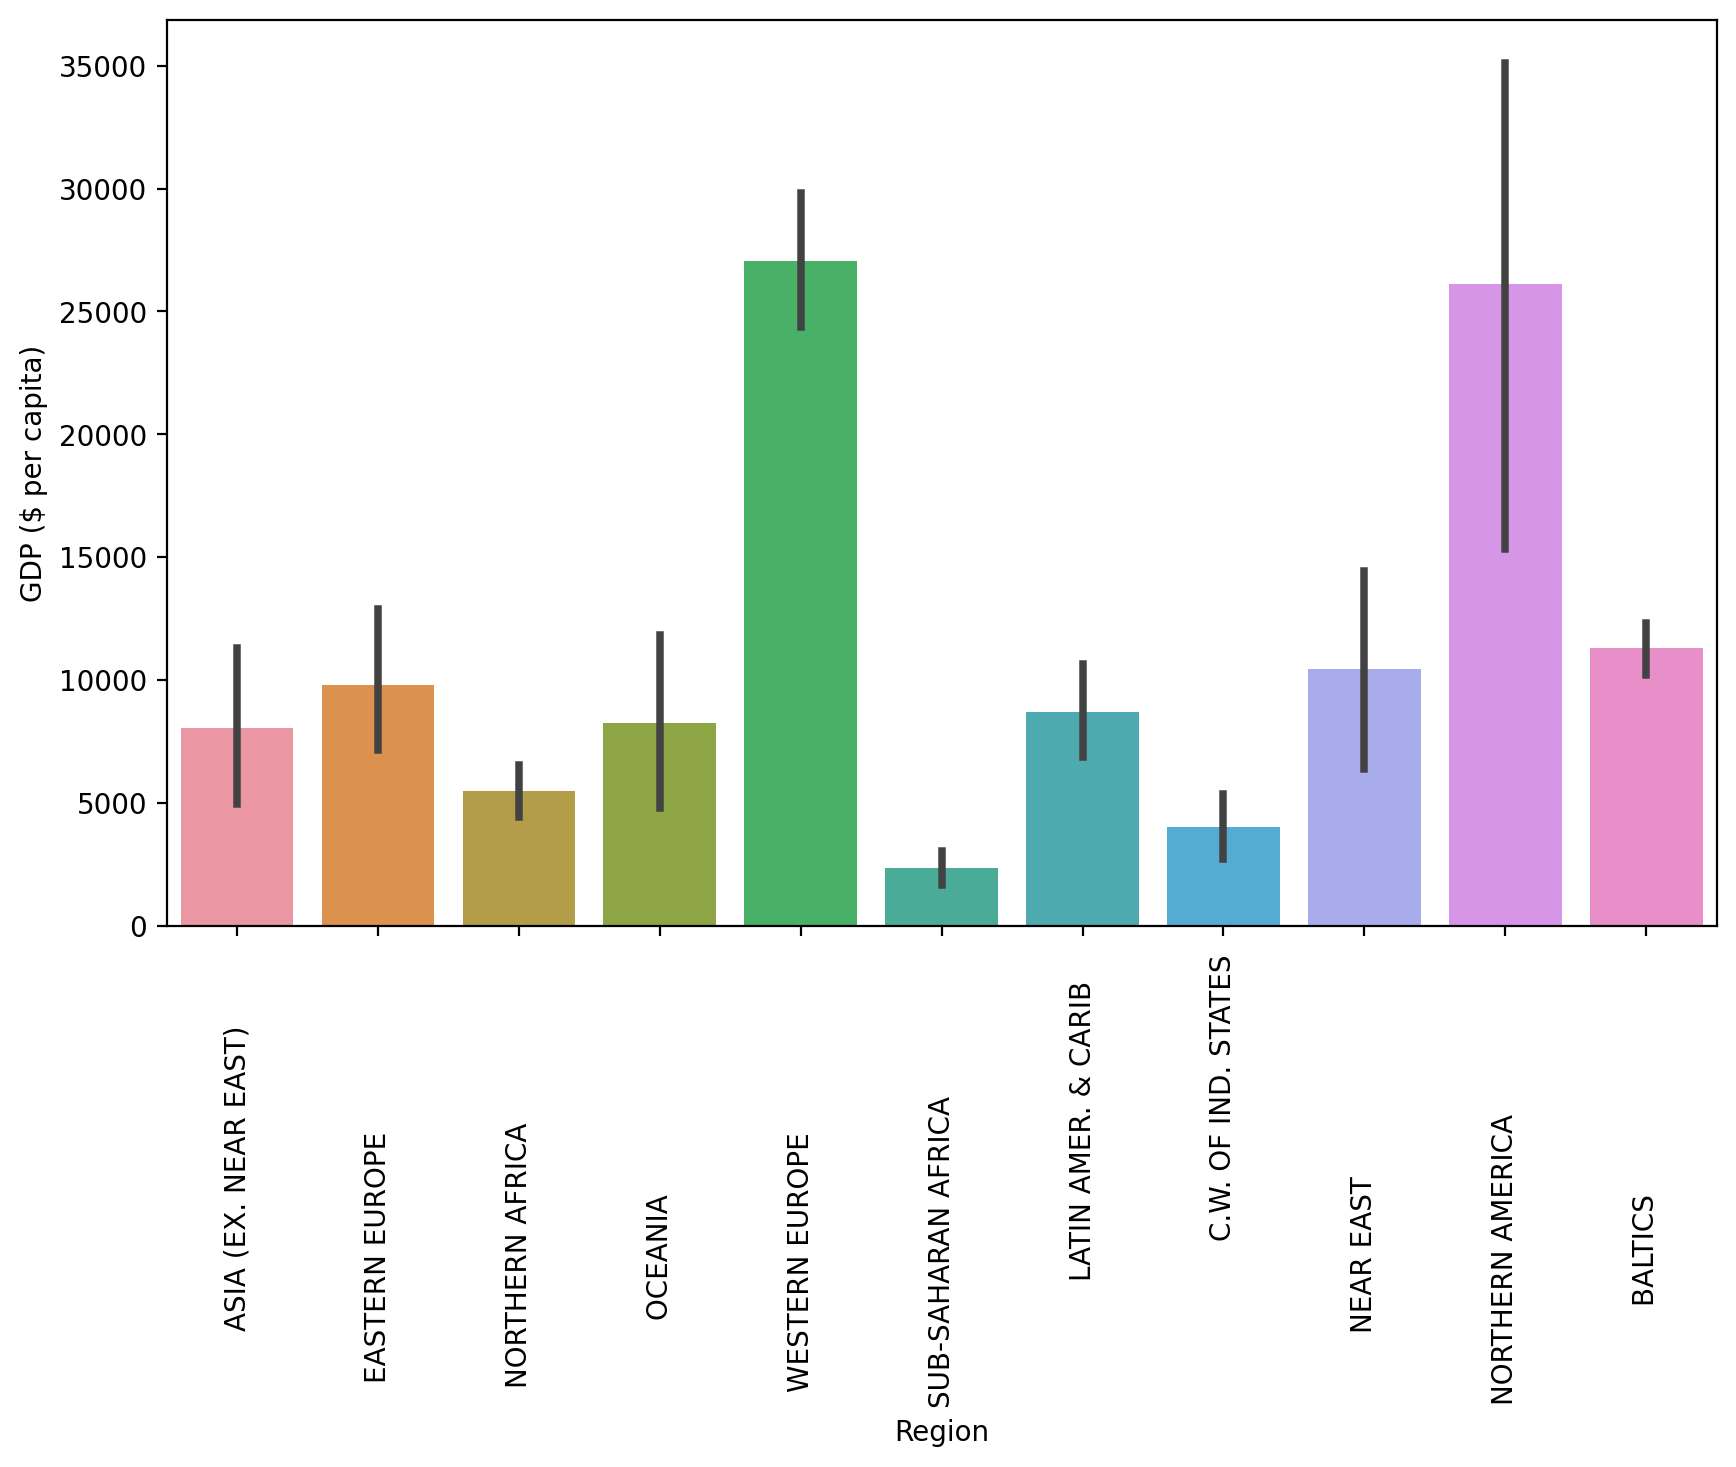

In [8]:
plt.figure(figsize = (10, 6),dpi = 200)
sns.barplot(data= df, y = 'GDP ($ per capita)', x = 'Region')
plt.xticks(rotation = 90);

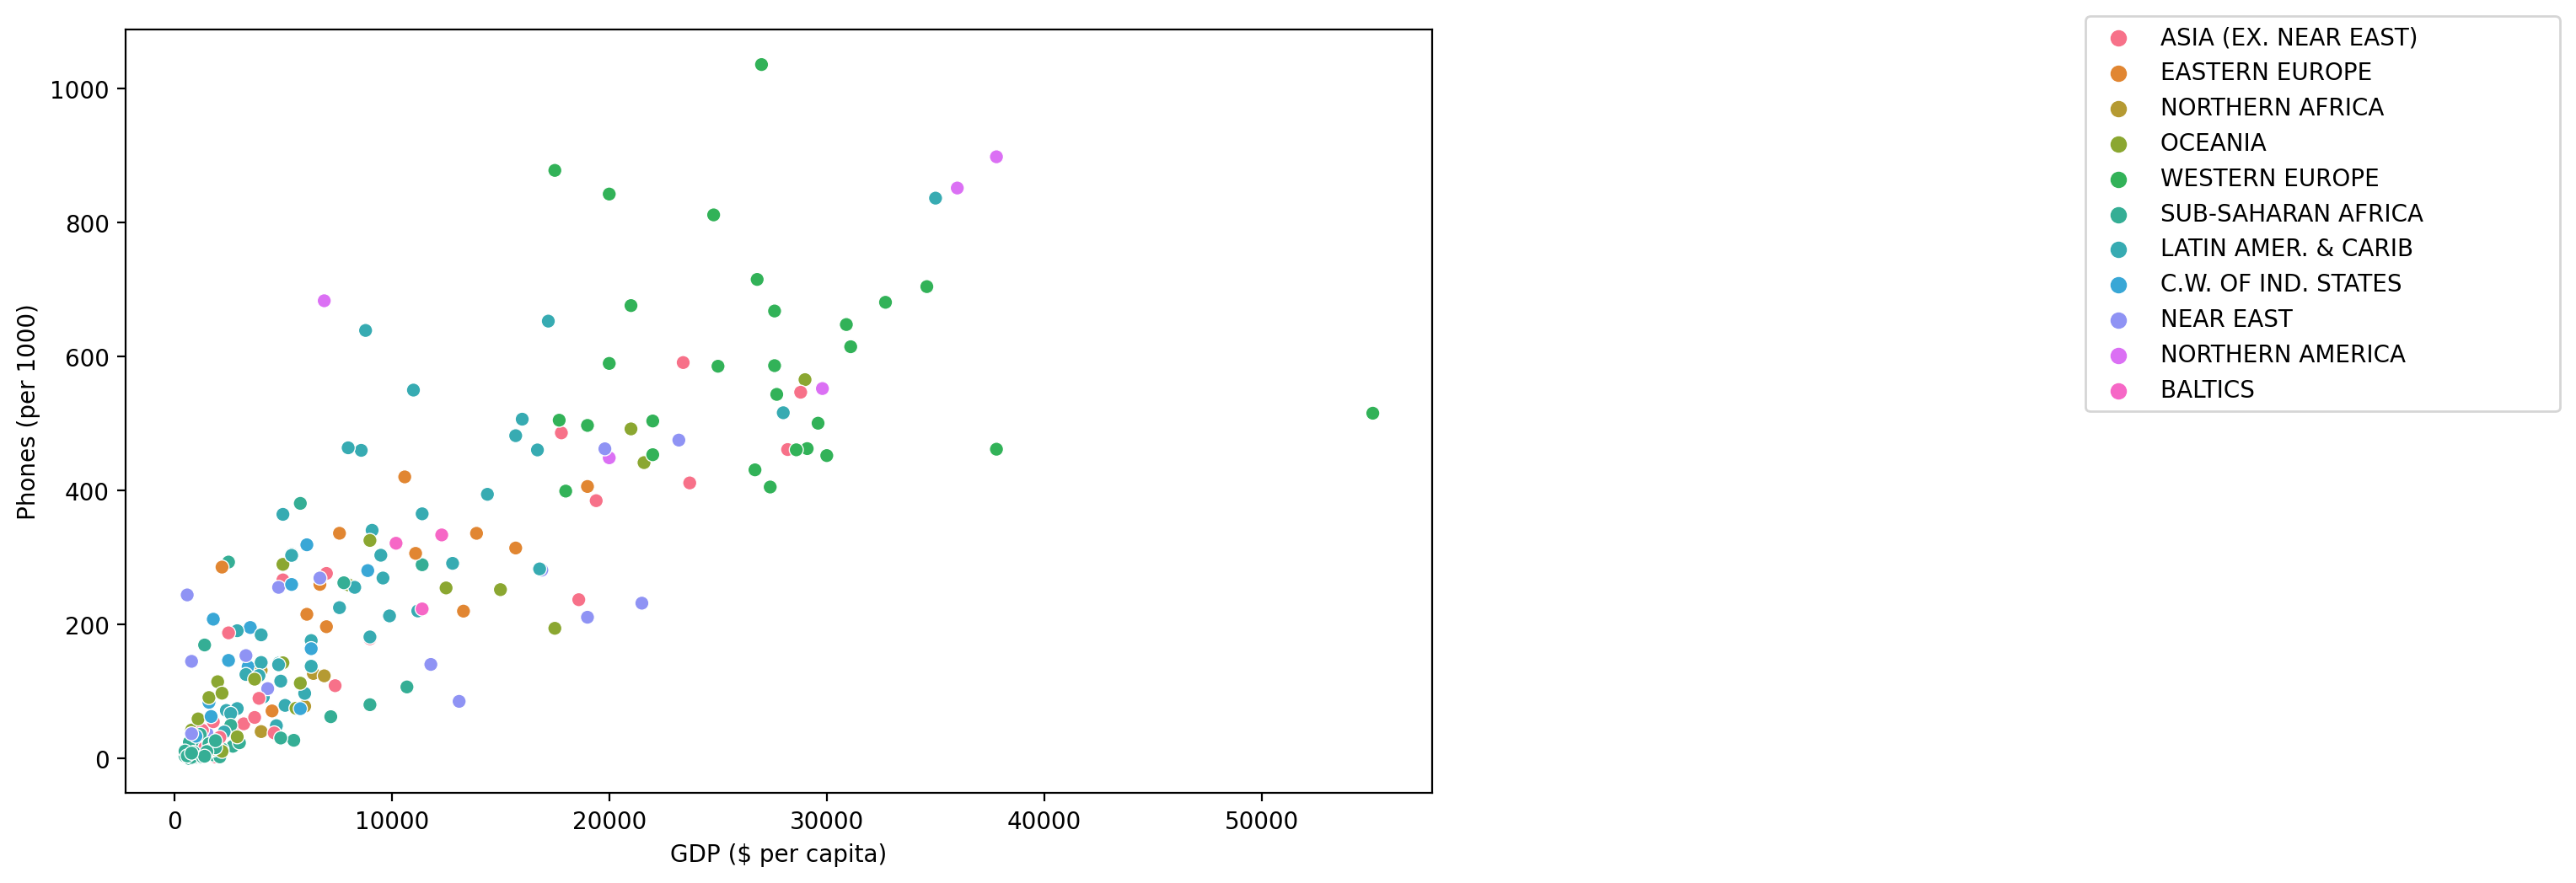

In [9]:
plt.figure(figsize = (10, 6), dpi = 200)
sns.scatterplot(data = df, x = 'GDP ($ per capita)', y = 'Phones (per 1000)', hue = 'Region')
plt.legend(loc = (1.5, 0.5))

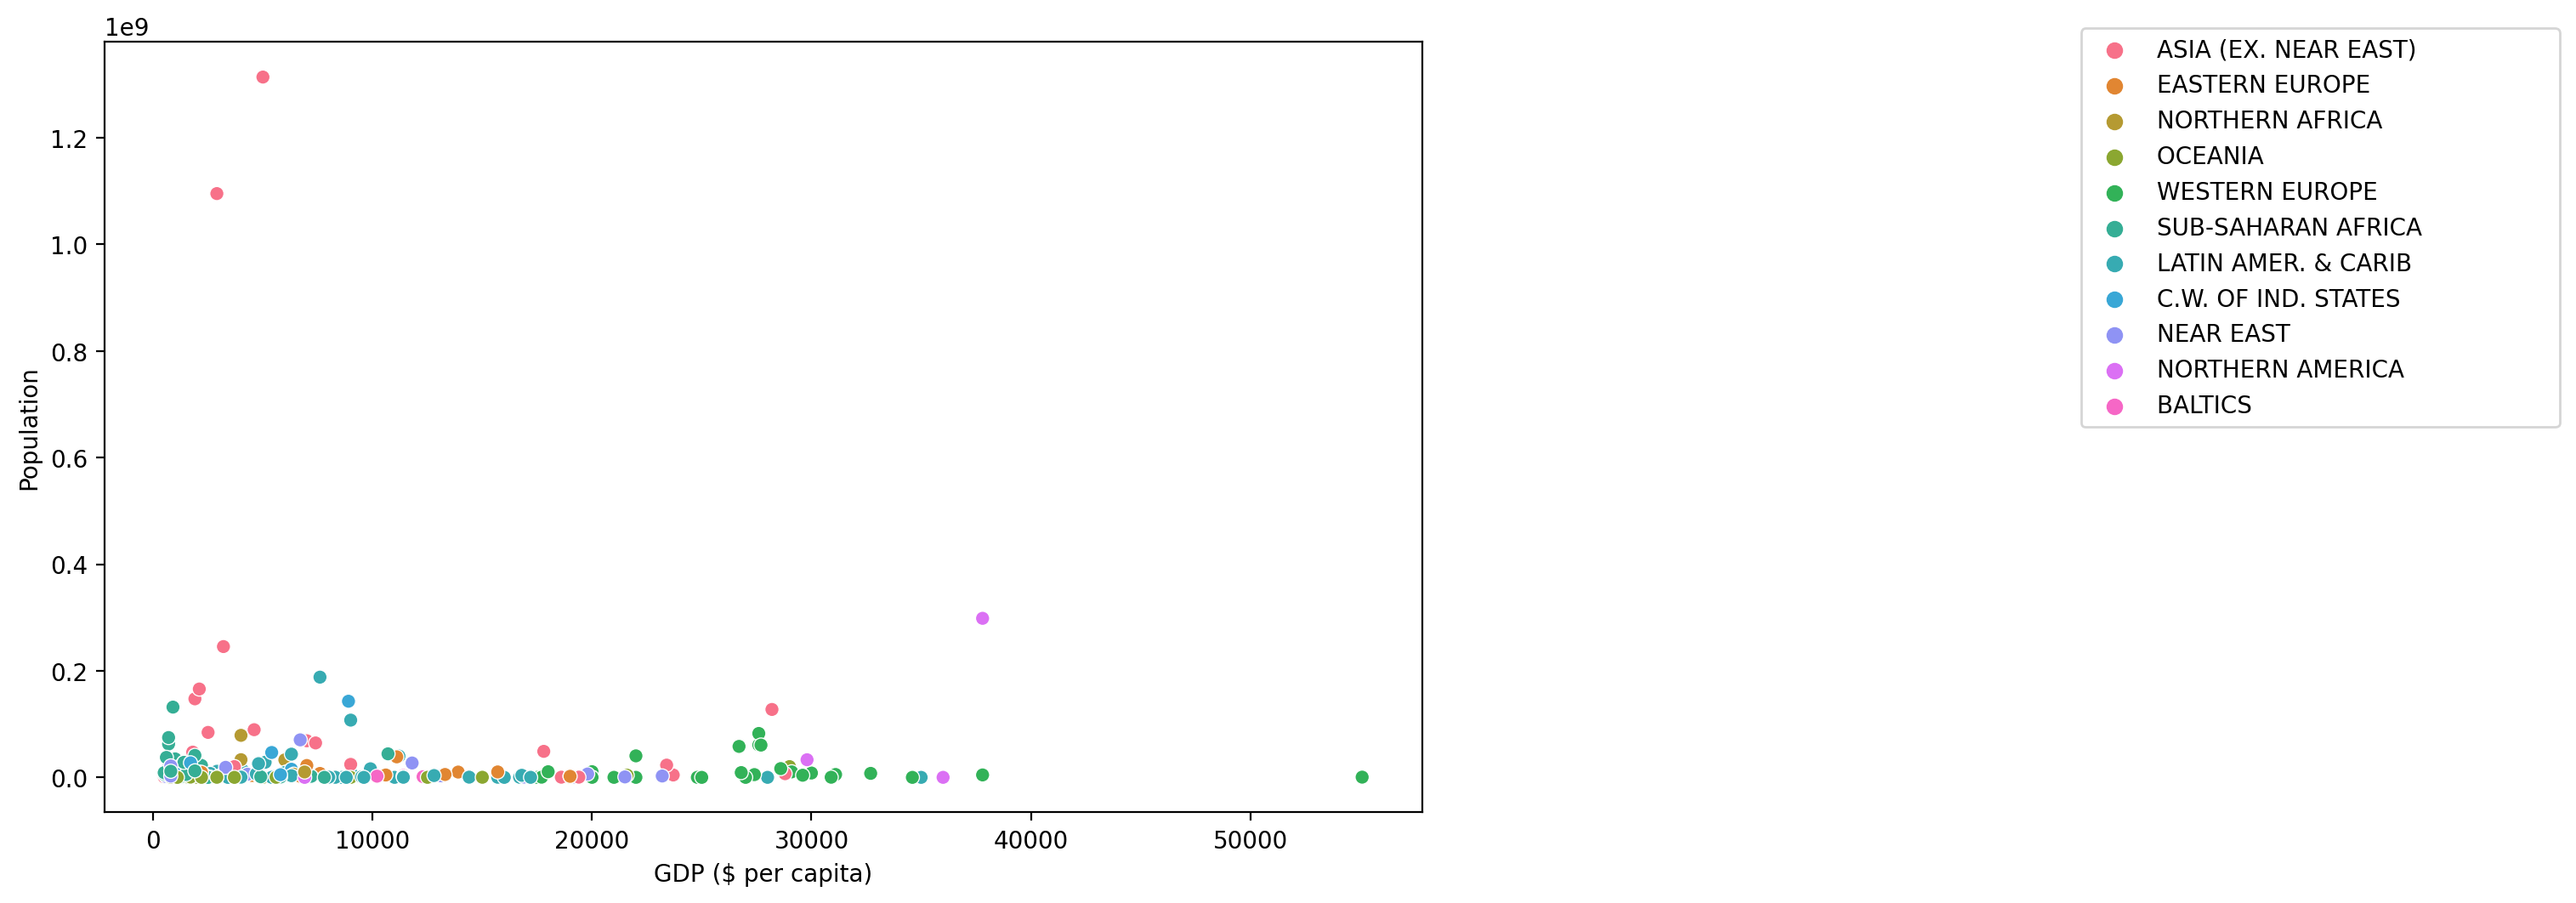

In [10]:
plt.figure(figsize = (10, 6), dpi = 200)
sns.scatterplot(data = df, x = 'GDP ($ per capita)', y = 'Population', hue = 'Region')
plt.legend(loc = (1.5, 0.5))

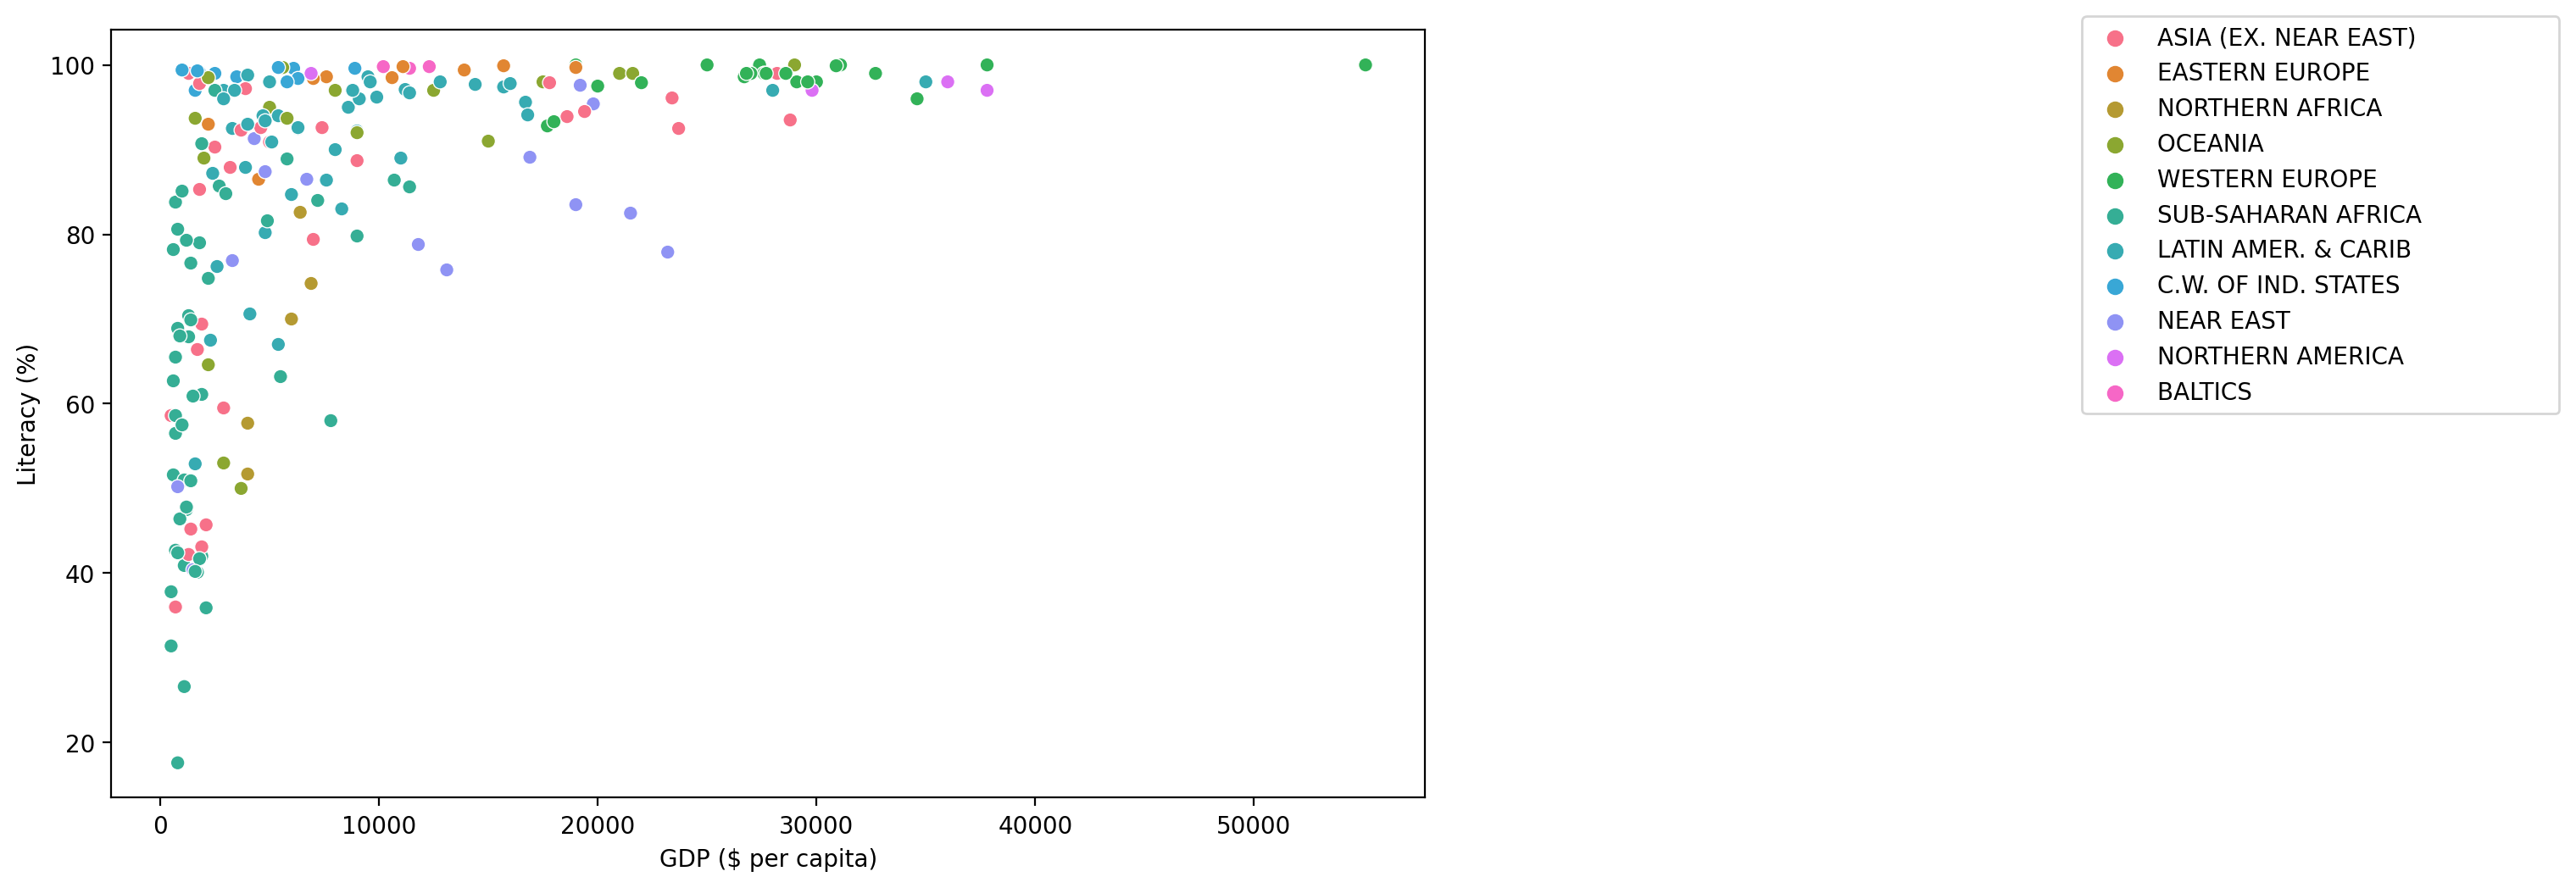

In [11]:
plt.figure(figsize = (10, 6), dpi = 200)
sns.scatterplot(data = df, x = 'GDP ($ per capita)', y = 'Literacy (%)', hue = 'Region')
plt.legend(loc = (1.5, 0.5))

<AxesSubplot:>

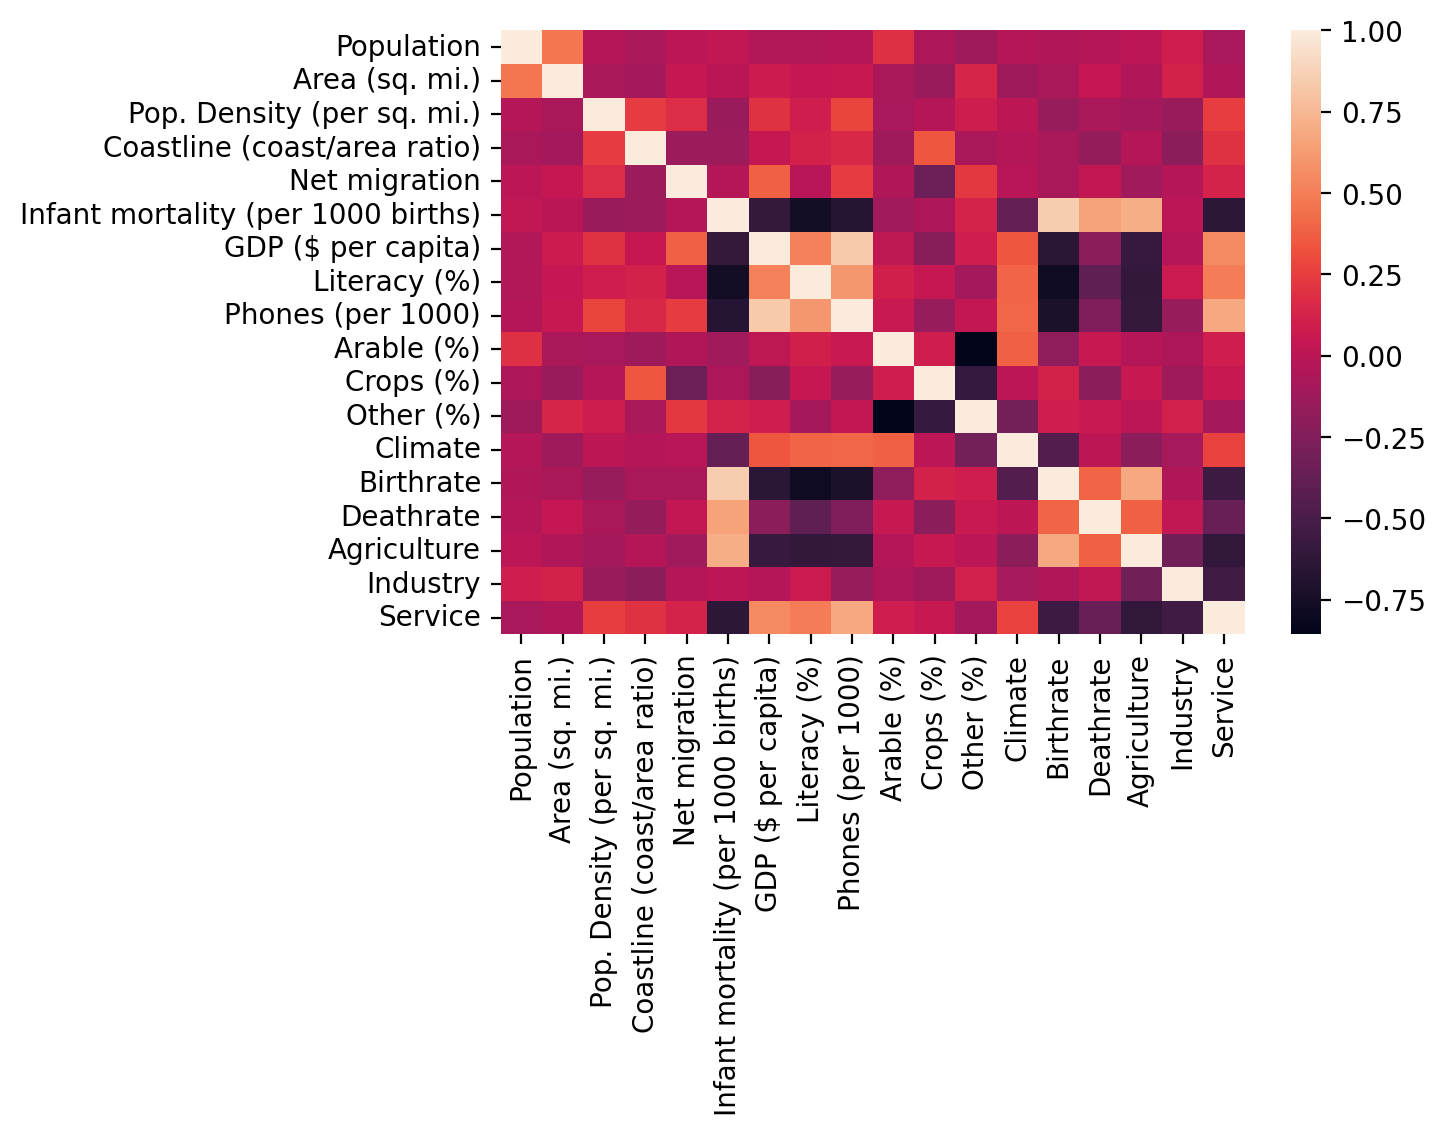

In [12]:
plt.figure(dpi = 200)
sns.heatmap(df.corr())

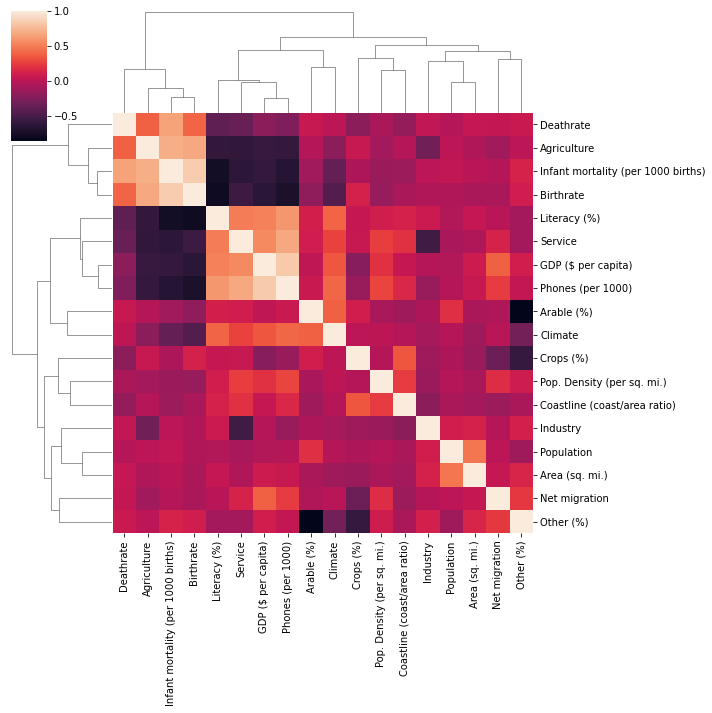

In [13]:
sns.clustermap(df.corr())

# Data Preparation

In [14]:
# Checking out the missing data
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [15]:
# What countries have NaN for Agriculture? What is the main aspect of these countries?
df[df["Agriculture"].isnull()]["Country"]

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

### Noticeable that most of these countries are islands and as such Agriculture can be said not to happen in most of them. Thus, the value will be replaced with Zero(0)

In [16]:
df[df["Agriculture"].isnull()] = df[df["Agriculture"].isnull()].fillna(0)

In [17]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

We can see that Climate is still missing. However, with region available, we can use this to our advantage. 

We will replace the missing climate values of the countires with the mean climate - value of respective region.

In [18]:
df["Climate"] = df["Climate"].fillna(df.groupby("Region")["Climate"].transform('mean'))

In [19]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

The same above method can be done for the Literacy level as well.

In [20]:
df["Literacy (%)"] = df["Literacy (%)"].fillna(df.groupby("Region")["Literacy (%)"].transform('mean'))

In [21]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

Since we have a minimal number of data with NAN, we can drop these rows

In [22]:
df = df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             221 non-null    object 
 1   Region                              221 non-null    object 
 2   Population                          221 non-null    int64  
 3   Area (sq. mi.)                      221 non-null    int64  
 4   Pop. Density (per sq. mi.)          221 non-null    float64
 5   Coastline (coast/area ratio)        221 non-null    float64
 6   Net migration                       221 non-null    float64
 7   Infant mortality (per 1000 births)  221 non-null    float64
 8   GDP ($ per capita)                  221 non-null    float64
 9   Literacy (%)                        221 non-null    float64
 10  Phones (per 1000)                   221 non-null    float64
 11  Arable (%)                          221 non-n

# Data Feature Preparation

We drop the Country column as it is a unique identifier string, so it won't be useful for clustering

In [24]:
X = df.drop("Country", axis = 1)

In [25]:
X.head()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000


To prepare our categorical variable for model, we can create a feature matrix using the "get_dummies" object

In [26]:
X = pd.get_dummies(X)

In [27]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


We scale this X-table as we have variations in the values.
some measurements being in terms of percentages and other metrics being total counts (population)

In [28]:
# Build the scaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [29]:
pd.DataFrame(scaled_X, columns = X.columns)

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,0.013329,0.018554,-0.203087,-0.281437,4.731286,3.589712,-0.886390,-1.986763,-1.021310,-0.125055,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,-0.167054,-0.152145,-0.315440,-0.547723,-0.365148
1,-0.217301,-0.323709,-0.143785,-0.263919,-1.009080,-0.397691,-0.506851,0.232886,-0.711124,0.562077,...,-0.117309,-0.239617,4.369314,-0.50565,-0.269844,-0.167054,-0.152145,-0.315440,-0.547723,-0.365148
2,0.029051,0.977850,-0.229563,-0.280881,-0.077988,-0.130643,-0.357033,-0.492346,-0.679649,-0.808353,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,5.986095,-0.152145,-0.315440,-0.547723,-0.365148
3,-0.246881,-0.339501,-0.015428,0.528961,-4.245343,-0.742768,-0.157275,0.694397,0.147817,-0.288402,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,-0.167054,-0.152145,3.170173,-0.547723,-0.365148
4,-0.246768,-0.339352,-0.122496,-0.281437,1.355565,-0.889813,0.941391,0.826257,1.232099,-0.885041,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,-0.167054,-0.152145,-0.315440,-0.547723,2.738613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,-0.226712,-0.336369,0.084827,-0.281437,0.613152,-0.451213,-0.876402,-0.073846,-0.373569,0.240751,...,-0.117309,-0.239617,-0.228869,-0.50565,3.705851,-0.167054,-0.152145,-0.315440,-0.547723,-0.365148
217,-0.245074,-0.192473,-0.239473,-0.275598,0.001995,-1.003900,-0.956305,-3.569087,-1.035907,-1.053757,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,5.986095,-0.152145,-0.315440,-0.547723,-0.365148
218,-0.067261,-0.047564,-0.208816,-0.276432,0.001995,0.728529,-0.876402,-1.362624,-0.866217,-0.842096,...,-0.117309,-0.239617,-0.228869,-0.50565,3.705851,-0.167054,-0.152145,-0.315440,-0.547723,-0.365148
219,-0.150817,0.076698,-0.228402,-0.281437,0.001995,1.483192,-0.876402,-0.026439,-0.998502,-0.512334,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,-0.167054,-0.152145,-0.315440,1.825742,-0.365148


# Creating and Fitting Kmeans Model

In [31]:
# Lets find the sum of squared distance

ssd = []
for k in range(2, 30):
    model = KMeans(n_clusters= k)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

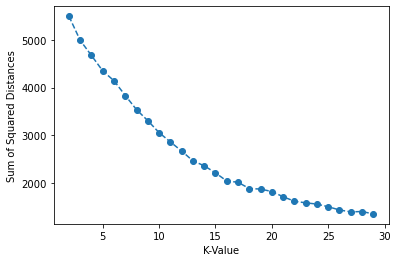

In [32]:
# A plot of the SSD and their respective number of clusters
plt.plot(range(2, 30), ssd, 'o--')
plt.xlabel("K-Value")
plt.ylabel("Sum of Squared Distances")

In [34]:
pd.Series(ssd).diff()

0            NaN
1    -505.870961
2    -318.517513
3    -323.429561
4    -207.073998
5    -309.729711
6    -297.790649
7    -231.032183
8    -251.107974
9    -195.160548
10   -190.871464
11   -206.535698
12   -103.207579
13   -148.640583
14   -170.778908
15    -27.121245
16   -131.835834
17    -10.798796
18    -52.214565
19   -108.678661
20    -94.377330
21    -34.186624
22    -25.742570
23    -56.111756
24    -67.551559
25    -40.581197
26      7.731303
27    -50.282133
dtype: float64

<AxesSubplot:>

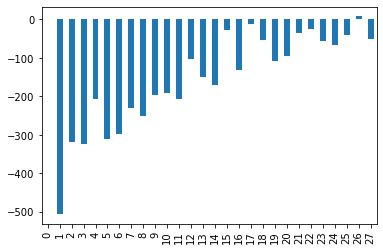

In [33]:
pd.Series(ssd).diff().plot(kind = 'bar')

# Model Interpretation

One could say that there is a significant drop off in SSD difference at K=3 (although we can see it continues to drop off past this). What would an analysis look like for K=3? Let's explore which features are important in the decision of 3 clusters!

In [37]:
model = KMeans(n_clusters = 3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [38]:
X["K3_cluster"] = model.labels_

In [39]:
X.corr()["K3_cluster"].sort_values()

Phones (per 1000)                            -0.761202
GDP ($ per capita)                           -0.717662
Literacy (%)                                 -0.577135
Region_WESTERN EUROPE                        -0.499753
Climate                                      -0.429186
Service                                      -0.412645
Region_EASTERN EUROPE                        -0.283411
Arable (%)                                   -0.267830
Pop. Density (per sq. mi.)                   -0.191432
Region_BALTICS                               -0.160553
Net migration                                -0.158924
Region_NORTHERN AMERICA                      -0.120991
Coastline (coast/area ratio)                 -0.075799
Region_C.W. OF IND. STATES                   -0.070330
Area (sq. mi.)                               -0.069490
Region_LATIN AMER. & CARIB                   -0.031632
Region_OCEANIA                               -0.024757
Region_ASIA (EX. NEAR EAST)                  -0.015415
Population

<AxesSubplot:>

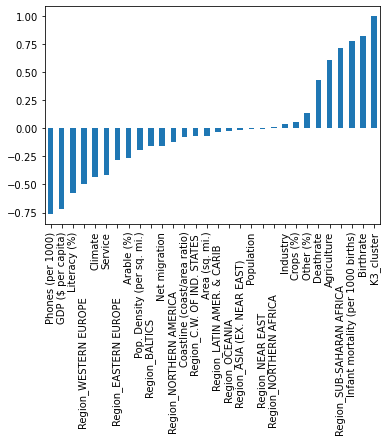

In [40]:
X.corr()["K3_cluster"].sort_values().plot(kind = 'bar')